In [1]:
import math
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import hcpdatautils as hcp

In [2]:
bool_type = torch.bool
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
data_dir = 'E:\\HCP_data'
results_dir = 'E:\\Ising_model_results_daai'

In [4]:
def make_histogram(name:str, values:torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist( values.flatten().detach().cpu().numpy() )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')
    plt.show()

In [5]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

In [7]:
model_file = os.path.join(results_dir, 'ising_model_individual_all_fold_1_parallel_10_steps_12000_beta_sims_100.pt')
model = torch.load(model_file)
print(model)

IsingModel()


In [8]:
print( model.beta.size() )

torch.Size([8370, 1])


In [9]:
num_parallel = 10
num_subjects = model.beta.numel()//num_parallel
beta = model.beta.squeeze(dim=-1).unflatten( dim=0, sizes=(num_parallel, num_subjects) )

In [10]:
beta_min_for_subject = beta.min(dim=-1).values
beta_mean_for_subject = beta.mean(dim=-1)
beta_max_for_subject = beta.max(dim=-1).values
beta_range_for_subject = beta_max_for_subject - beta_min_for_subject

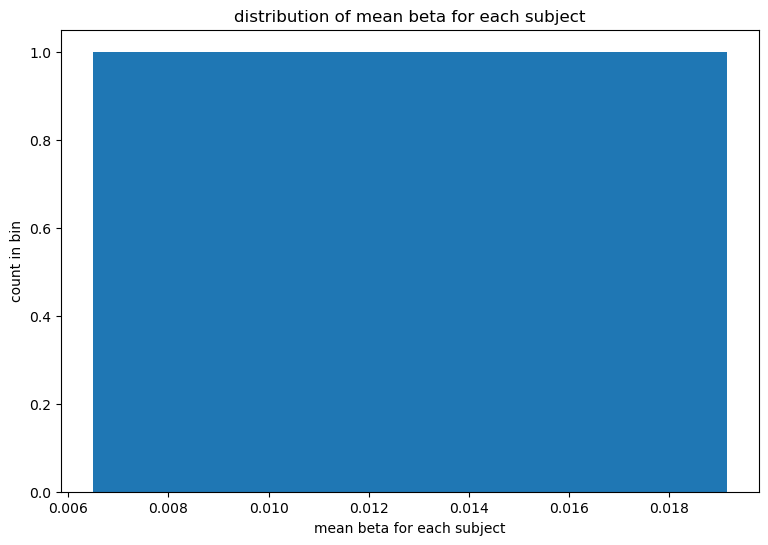

The distribution of mean beta for each subject values has median 0.0128 with 95% CI [0.00681, 0.0188] and range [0.0065, 0.0192].


In [11]:
name = 'mean beta for each subject'
values = beta_mean_for_subject
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

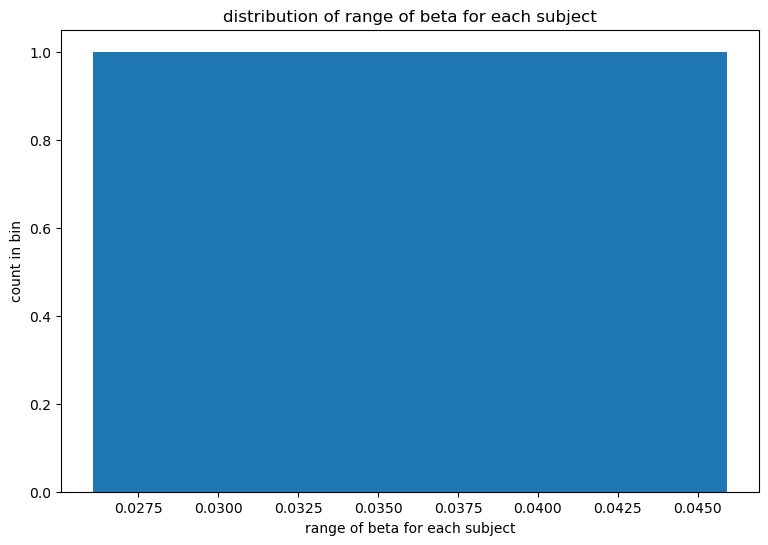

The distribution of range of beta for each subject values has median 0.036 with 95% CI [0.0266, 0.0454] and range [0.0261, 0.0459].


In [12]:
name = 'range of beta for each subject'
values = beta_range_for_subject
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d4fa701030>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x1d4fa701570>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x1d4fa700d90>,
 'medians': [<matplotlib.lines.Line2D at 0x1d4fa701ab0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d4fa701d50>,
 'means': []}

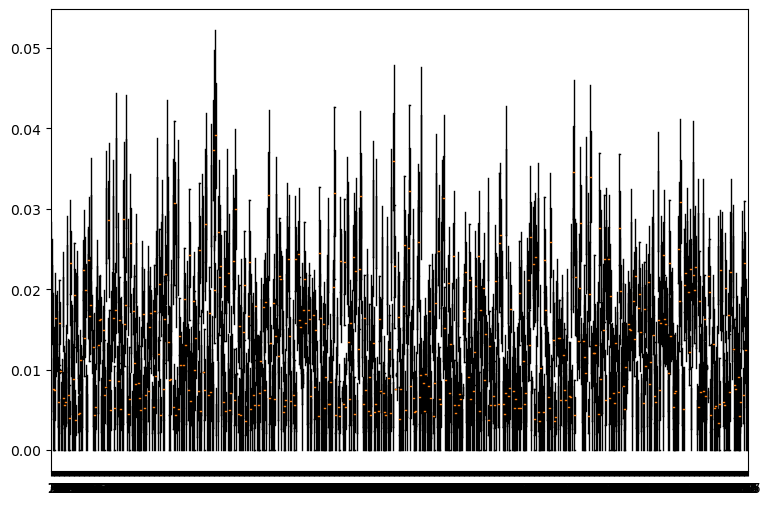

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
axs.boxplot( beta.transpose(dim0=0, dim1=1).tolist() )

In [15]:
fc_rmse_file = os.path.join(results_dir, 'fc_rmse_individual_all_fold_1_parallel_10_steps_12000_beta_sims_100.pt')
fc_rmse = torch.load(fc_rmse_file)
print( fc_rmse.size() )

torch.Size([10, 837])


Text(0, 0.5, 'FC RMSE')

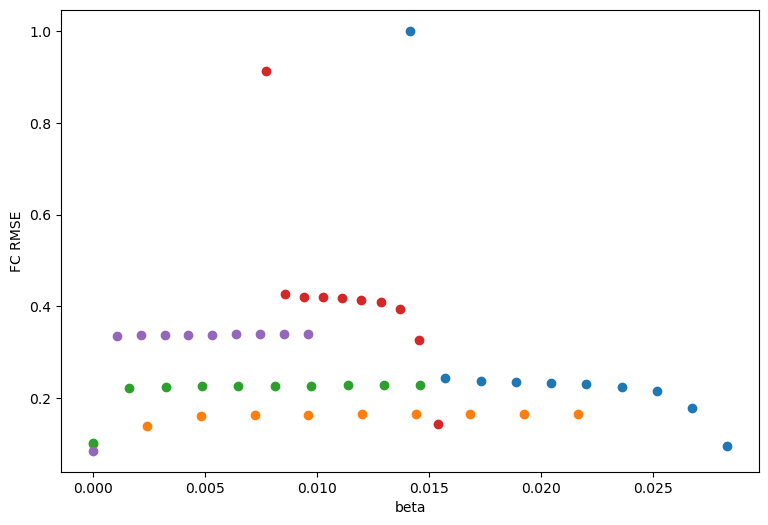

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
for subject in [0, 100, 200, 300, 400]:
    axs.scatter( beta[:,subject].tolist(), fc_rmse[:,subject].tolist() )
axs.set_xlabel('beta')
axs.set_ylabel('FC RMSE')

In [26]:
num_nodes = 360
print(num_nodes)
num_pairs = num_nodes*(num_nodes-1)//2
print(num_pairs)
num_nodes_2 = int(  ( math.sqrt(1 + 8*num_pairs) + 1 )/2  )
print(num_nodes_2)

360
64620
360
